## Decision Tree Classification in Python

## Importing the Required Libraries and Reading the data

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler, normalize      #standardization of data to balance the unit between different variables  

In [112]:
fraud_data= pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Working Problem

Use decision trees to prepare a model on fraud data 

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not


## EDA - Working on data

In [110]:
fraud_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600.000000,600.000000,600.000000,600.000000,600
unique,2,NaN,NaN,NaN,NaN,2
top,YES,NaN,NaN,NaN,NaN,YES
freq,312,NaN,NaN,NaN,NaN,302
mean,NaN,1.953333,55208.375000,108747.368333,15.558333,NaN
std,NaN,0.821958,26204.827597,49850.075134,8.842147,NaN
min,NaN,1.000000,10003.000000,25779.000000,0.000000,NaN
25%,NaN,1.000000,32871.500000,66966.750000,8.000000,NaN
50%,NaN,2.000000,55074.500000,106493.500000,15.000000,NaN
75%,NaN,3.000000,78611.750000,150114.250000,24.000000,NaN


In [38]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [39]:
fraud_data.isna().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [40]:
fraud_data.shape

(600, 6)

In [113]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [108]:
#marital_choice={'Single':1,'Married':2, 'Divorced':3}
#fraud_data['Marital.Status']=fraud_data['Marital.Status'].map(marital_choice)
#fraud_data.groupby(fraud_data['Marital.Status'])['Marital.Status'].count()

Marital.Status
1    217
2    194
3    189
Name: Marital.Status, dtype: int64

In [114]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [116]:
#Label Encoder
label_encoder = LabelEncoder()
fraud_data['Marital.Status']= label_encoder.fit_transform(fraud_data['Marital.Status']) 
fraud_data['Undergrad']= label_encoder.fit_transform(fraud_data['Undergrad']) 
fraud_data['Urban']= label_encoder.fit_transform(fraud_data['Urban'])
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [117]:
fraud_data= fraud_data.rename(columns={'Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience','Marital.Status':'Marital_Status'})
fraud_data

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [118]:
result =[]
for val in fraud_data['Taxable_Income']:
        if (val <= 30000):
            result.append('Risky')                       
        else:
             result.append('Good')

fraud_data['Taxable_Income_Group']= result
fraud_data.head(50)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Income_Group
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
5,0,0,33329,116382,0,0,Good
6,0,0,83357,80890,8,1,Good
7,1,2,62774,131253,3,1,Good
8,0,2,83519,102481,12,1,Good
9,1,0,98152,155482,4,1,Good


In [119]:
#Complete Iris dataset
label_encoder = LabelEncoder()
fraud_data['Taxable_Income_Group']= label_encoder.fit_transform(fraud_data['Taxable_Income_Group'])
fraud_data

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Income_Group
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [120]:
fraud_data.head(50)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Income_Group
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
5,0,0,33329,116382,0,0,0
6,0,0,83357,80890,8,1,0
7,1,2,62774,131253,3,1,0
8,0,2,83519,102481,12,1,0
9,1,0,98152,155482,4,1,0


In [125]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Undergrad             600 non-null    int32
 1   Marital_Status        600 non-null    int32
 2   Taxable_Income        600 non-null    int64
 3   City_Population       600 non-null    int64
 4   Work_Experience       600 non-null    int64
 5   Urban                 600 non-null    int32
 6   Taxable_Income_Group  600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


<AxesSubplot:xlabel='Taxable_Income'>

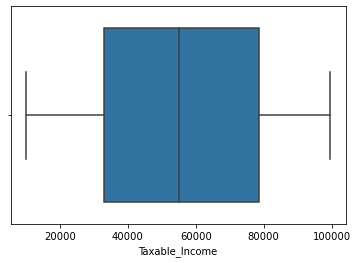

In [122]:
sns.boxplot(fraud_data.Taxable_Income)

<AxesSubplot:xlabel='City_Population'>

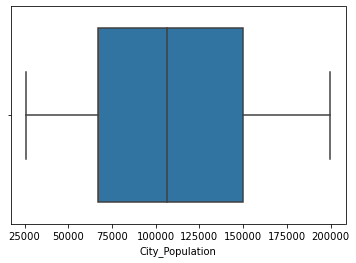

In [50]:
sns.boxplot(fraud_data.City_Population)

<AxesSubplot:xlabel='Work_Experience'>

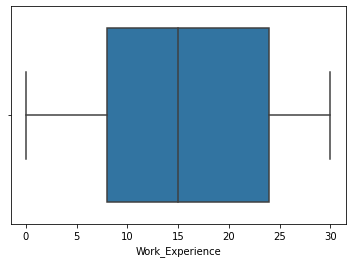

In [51]:
sns.boxplot(fraud_data.Work_Experience)

There are no outliers in the dataset.

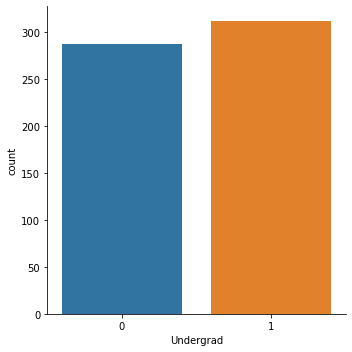

In [126]:
sns.factorplot('Undergrad',data=fraud_data,kind='count')

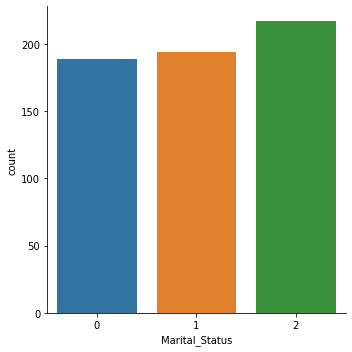

In [123]:
sns.factorplot('Marital_Status',data=fraud_data,kind='count')

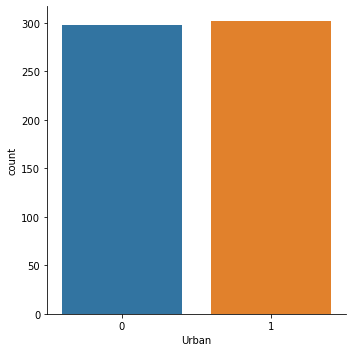

In [127]:
sns.factorplot('Urban',data=fraud_data,kind='count')

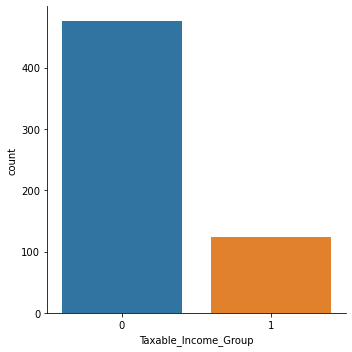

In [128]:
sns.factorplot('Taxable_Income_Group',data=fraud_data,kind='count')

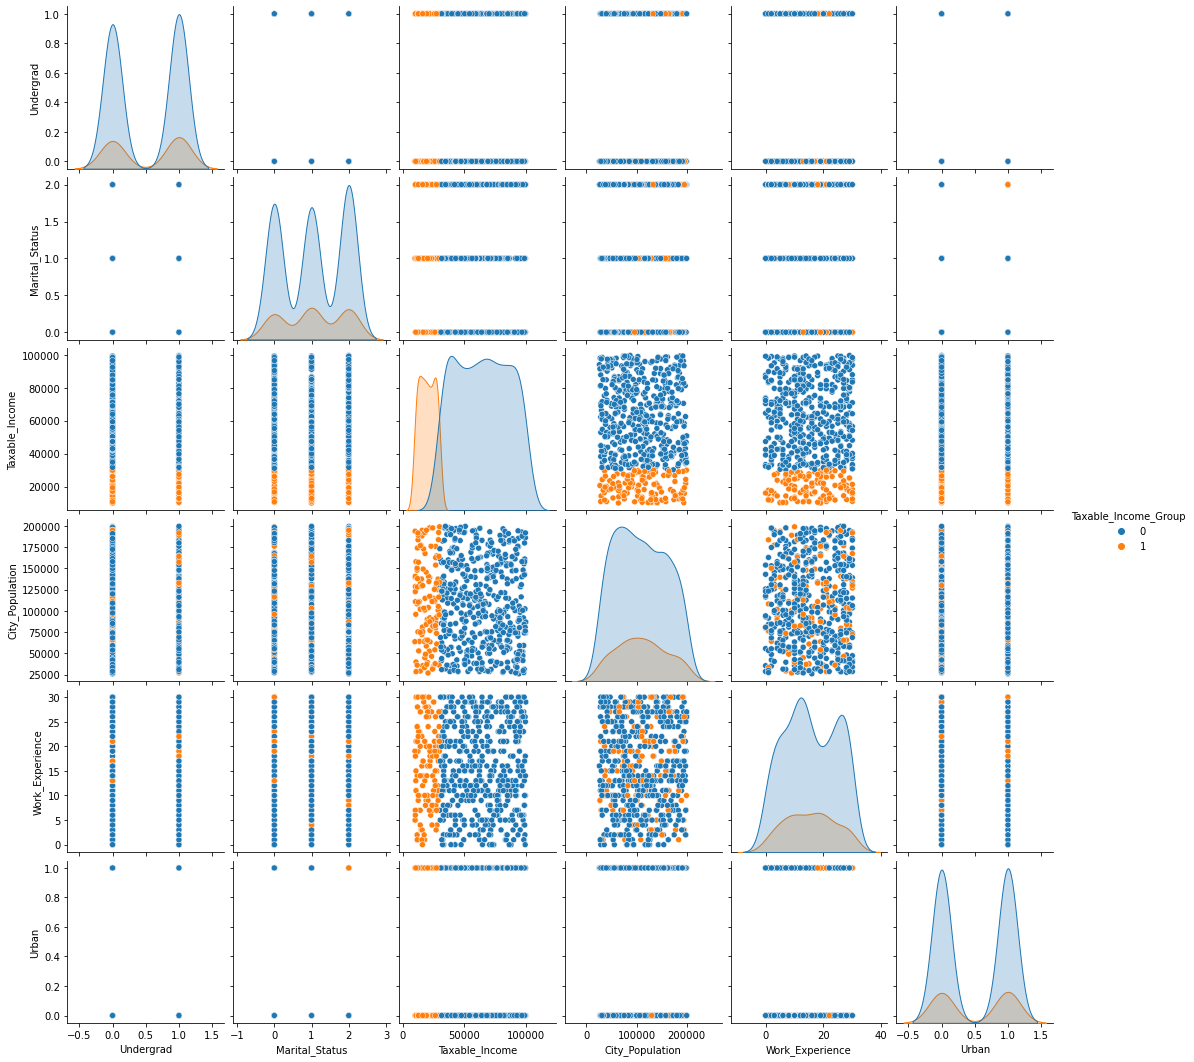

In [129]:
sns.pairplot(data=fraud_data,hue='Taxable_Income_Group')

We have total of 2 segment for the Taxable Income that we want to predict: Risky & Good. The scatter plot for the dataset are well separate.

<AxesSubplot:>

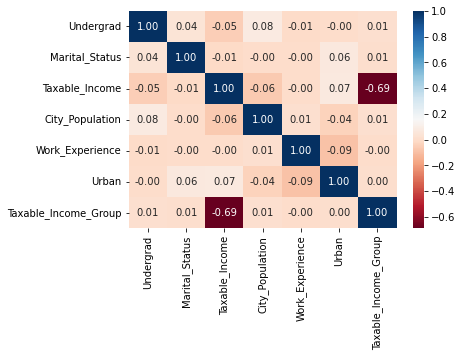

In [130]:
sns.heatmap(fraud_data.corr(),annot=True, cmap='RdBu',fmt='.2f')

We can observe from the above two graph:
1. Taxable_Income and Taxable Income Group are negatively corelated with each other.

In [137]:
fraud_data.tail(10)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Income_Group
590,0,1,43018,85195,14,1,0
591,1,2,27394,132859,18,1,1
592,1,2,68152,75143,16,0,0
593,0,0,84775,131963,10,1,0
594,0,1,47364,97526,9,1,0
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0
599,0,0,96519,158137,16,0,0


In [132]:
duplicate= fraud_data[fraud_data.duplicated()]
duplicate

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Income_Group


In [133]:
fraud_data.shape

(600, 7)

In [140]:
fraud_data.columns

Index(['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population',
       'Work_Experience', 'Urban', 'Taxable_Income_Group'],
      dtype='object')

## Preprocessing the data

In [135]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [138]:
# Normalized data frame (considering the numerical part of data)
fraud_data1 = norm_func(fraud_data)
fraud_data1.tail(10)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Income_Group
590,0.0,0.5,0.368405,0.341473,0.466667,1.0,0.0
591,1.0,1.0,0.194061,0.615406,0.600000,1.0,1.0
592,1.0,1.0,0.648869,0.283703,0.533333,0.0,0.0
593,0.0,0.0,0.834360,0.610256,0.333333,1.0,0.0
594,0.0,0.5,0.416901,0.412341,0.300000,1.0,0.0
595,1.0,0.0,0.740236,0.078811,0.233333,1.0,0.0
596,1.0,0.0,0.669122,0.170058,0.066667,1.0,0.0
597,0.0,0.0,0.416566,0.737240,0.000000,1.0,0.0
598,1.0,0.5,0.988540,0.886810,0.566667,0.0,0.0
599,0.0,0.0,0.965408,0.760683,0.533333,0.0,0.0


In [139]:
fraud_data1.shape

(600, 7)

## Feature Selection

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [141]:
#split dataset in features and target variable
feature_cols= ['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population','Work_Experience', 'Urban']
X= fraud_data1[feature_cols] #feature
y= fraud_data1.Taxable_Income_Group

## Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [142]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3,random_state=0 )

In [144]:
fraud_data1.Taxable_Income_Group.value_counts()

0.0    476
1.0    124
Name: Taxable_Income_Group, dtype: int64

In [145]:
fraud_data1.Marital_Status.value_counts()

1.0    217
0.5    194
0.0    189
Name: Marital_Status, dtype: int64

In [146]:
print("Testing split input- ", X_test.shape)
print("Training split input- ", X_train.shape)

Testing split input-  (180, 6)
Training split input-  (420, 6)


## Building Decision Tree Classifier using Entropy Criteria

In [152]:
# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
# Train Decision Tree Classifer
model.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [153]:
# Predicting the values of test data
y_pred = model.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       137
         1.0       1.00      1.00      1.00        43

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



We got an accuracy of 100% on the testing dataset of 180 records.

In [154]:
pd.crosstab(y_test,y_pred)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0.0,1.0
Taxable_Income_Group,,
0.0,137,0
1.0,0,43


In [155]:
# Accuracy 
np.mean(y_pred==y_test)

1.0

Text(0.5, 1.0, 'Accuracy Score: 1.0')

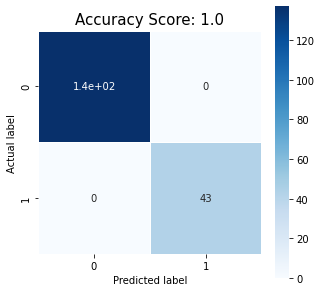

In [156]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=0.5, annot=True, square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## Visualizing the decision tree

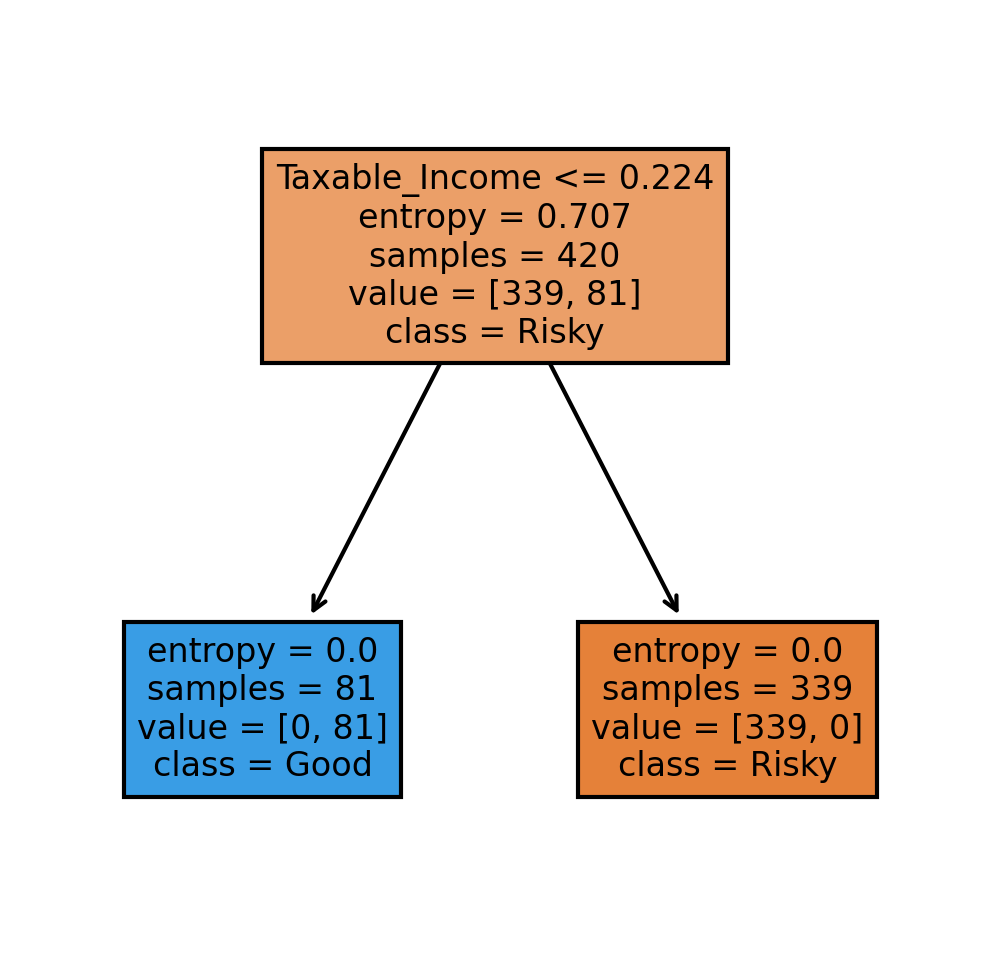

In [157]:
fn=['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population','Work_Experience', 'Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

We can see how the tree is split, what are the entropy for the nodes, the records in those nodes, and their labels. Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.

In [158]:
model.feature_importances_ 

array([0., 0., 1., 0., 0., 0.])

In [159]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Taxable_Income     1.0
Undergrad          0.0
Marital_Status     0.0
City_Population    0.0
Work_Experience    0.0
Urban              0.0
dtype: float64

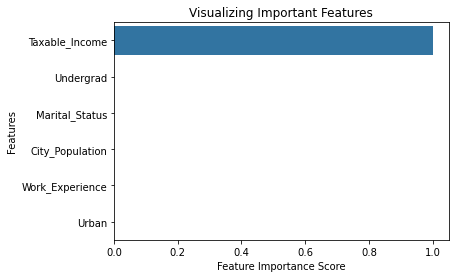

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [161]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

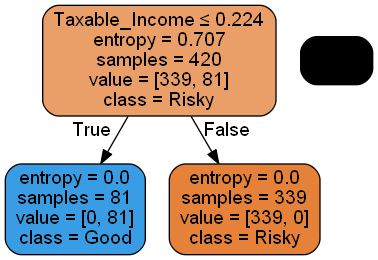

In [162]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = fn,class_names=cn)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [166]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
